#PART - A


In [19]:
import numpy as np
import random
import scipy.stats as st
import pandas as pd

H0: for every plant that Mendel grew, there is a 75% chance that it will have purple flowers. 
H1: for every plant the Mendel grew, the chance of the plant having purple flowers is greater than 75%.


purple flowers expected = 705                                    
purple flowers got after testing = 705 +49 = 754

In [18]:
# assume 1 as purple flower and 0 as white flower 
flowers = [1]*705
white = [0]*224
flowers.extend(white)
random.shuffle(flowers)
flowers[700:712]

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]

In [22]:
unique, counts = np.unique(flowers, return_counts=True)
b = dict(zip(unique,counts))
purple_count = b[1]
purple_count

705

In [23]:
observed_proportion = purple_count/929
observed_proportion

0.7588805166846071

In [24]:
observed_statistic = abs(((705+49)/929)-observed_proportion)
observed_statistic

0.052744886975242156

In [28]:
model_colors = [1,1,1,0]
new_sample = np.random.choice(model_colors, 929)

In [29]:
proportion_purple = np.count_nonzero(new_sample == 1)/929
print("Proportion of purple-flowers in this new sample which differs from 0.75 is", abs(proportion_purple - 0.75))

Proportion of purple-flowers in this new sample which differs from 0.75 is 0.0072658772874057975


In [30]:
import numpy.random as npr

repetitions = 2000-249

for i in range(repetitions):
    sim = npr.binomial(929, 0.75, repetitions)
    
sim


array([680, 710, 681, ..., 710, 682, 676])

In [41]:
df = pd.DataFrame(sim, columns =['Count'])

df['sampled_stats']= (df['Count'] / 929)
df = df.set_index('Count')
df['Distance from 0.75'] = abs(df['sampled_stats'] - 0.75)

df.head()

,sampled_stats,Distance from 0.75
Count,,
680,0.731970,0.018030
710,0.764263,0.014263
681,0.733046,0.016954
683,0.735199,0.014801
691,0.743811,0.006189


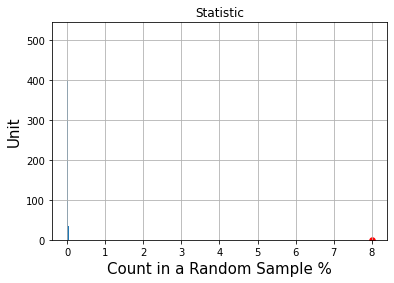

In [42]:
df['Distance from 0.75'].hist()
plt.title('Statistic');
plt.xlabel('Count in a Random Sample %',fontsize=15)
plt.ylabel('Unit',fontsize=15);
plt.scatter(8, 0, color='red', s=30)

The null hypothesis is rejected 

#PART B 

Carry out a hypothesis test for “mean” of a population. The population standard deviation is
13.46, and the test is for a “mean” different from 60. Given: a sample size of 30, with “sample
mean” 65.10. Consider alpha = 0.05. Demonstrate your solution using either the critical-value or p-value method.
------------------------

In [5]:
n = 30
xbar = 65.1
mu = 60
sigma = 13.46
alpha = 0.05


In [6]:
z_critical = abs(st.norm.ppf(alpha/2))
z_critical

1.9599639845400545

In [7]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

2.075323211943792

In [8]:
if (z < z_critical): #two - tailed test
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis
